[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


tickers.csv generated at: processed_data/comm_analysis/tickers/dataset_tickers.csv
tickers.csv generated at: processed_data/sentiment/dataset_tickers.csv
metal_prices.csv generated at: processed_data/comm_analysis/metal


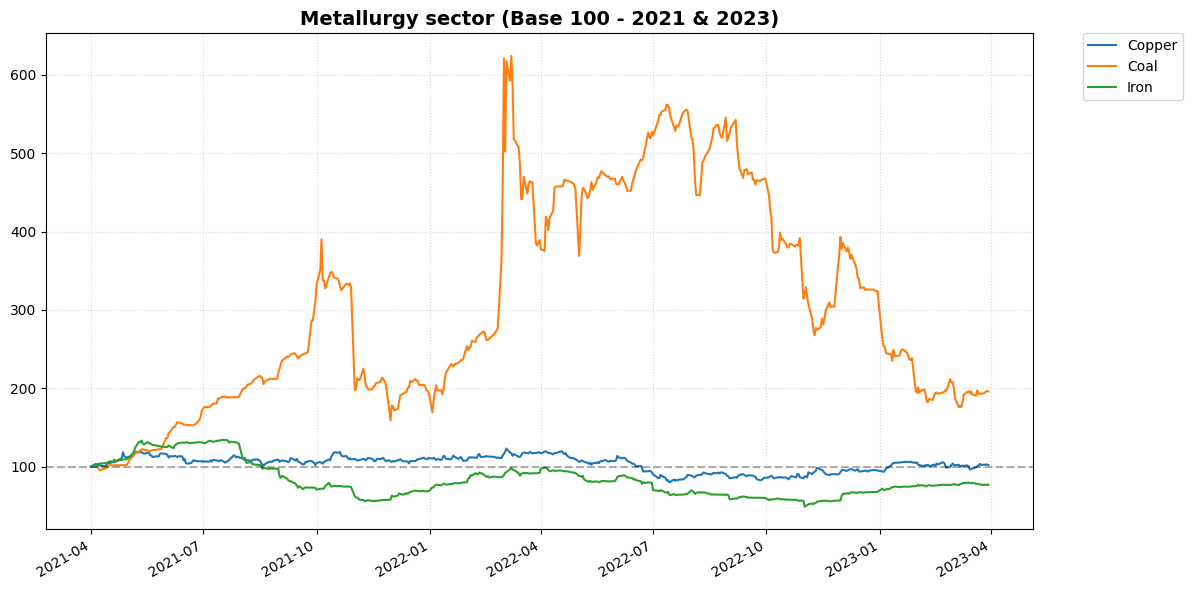

metal_base_100.csv generated at: processed_data/comm_analysis/metal/graph_data/
Graph generated at: plots/comm_analysis/metal/Base_100_metal.png
--- ADF Test Results for: Copper (LOG-RETURNS) ---
ADF Statistic: -10.7046
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Coal (LOG-RETURNS) ---
ADF Statistic: -21.5827
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Iron (LOG-RETURNS) ---
ADF Statistic: -9.4393
p-value: 0.0000
Result: STATIONARY
----------------------------------------
metal_adf_test.csv generated at: processed_data/comm_analysis/metal/validation/
--- ADF Test Results for: Mitsubishi_JPY (LOG-RETURNS) ---
ADF Statistic: -22.7998
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: USDJPY (LOG-RETURNS) ---
ADF Statistic: -23.2817
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Resu

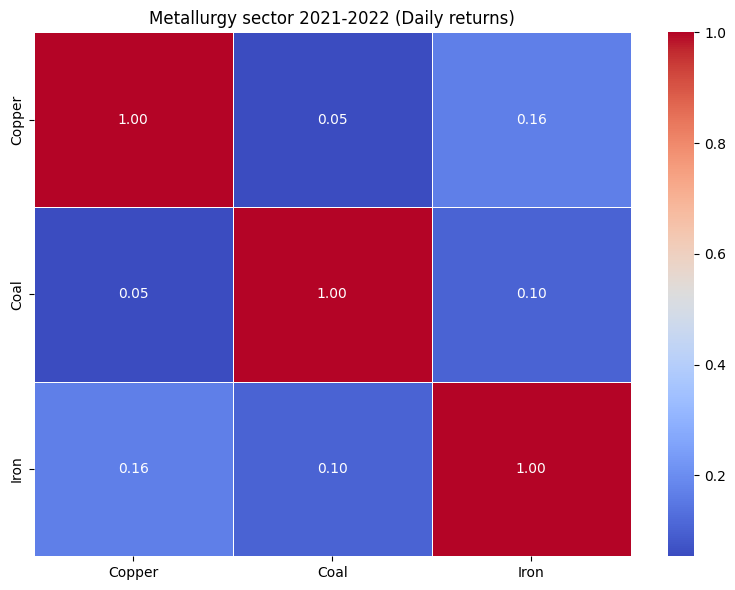

metal_corr_matrix.csv generated at: processed_data/comm_analysis/metal/graph_data/
Graph generated at: plots/comm_analysis/metal/Daily_Corr_metal.png


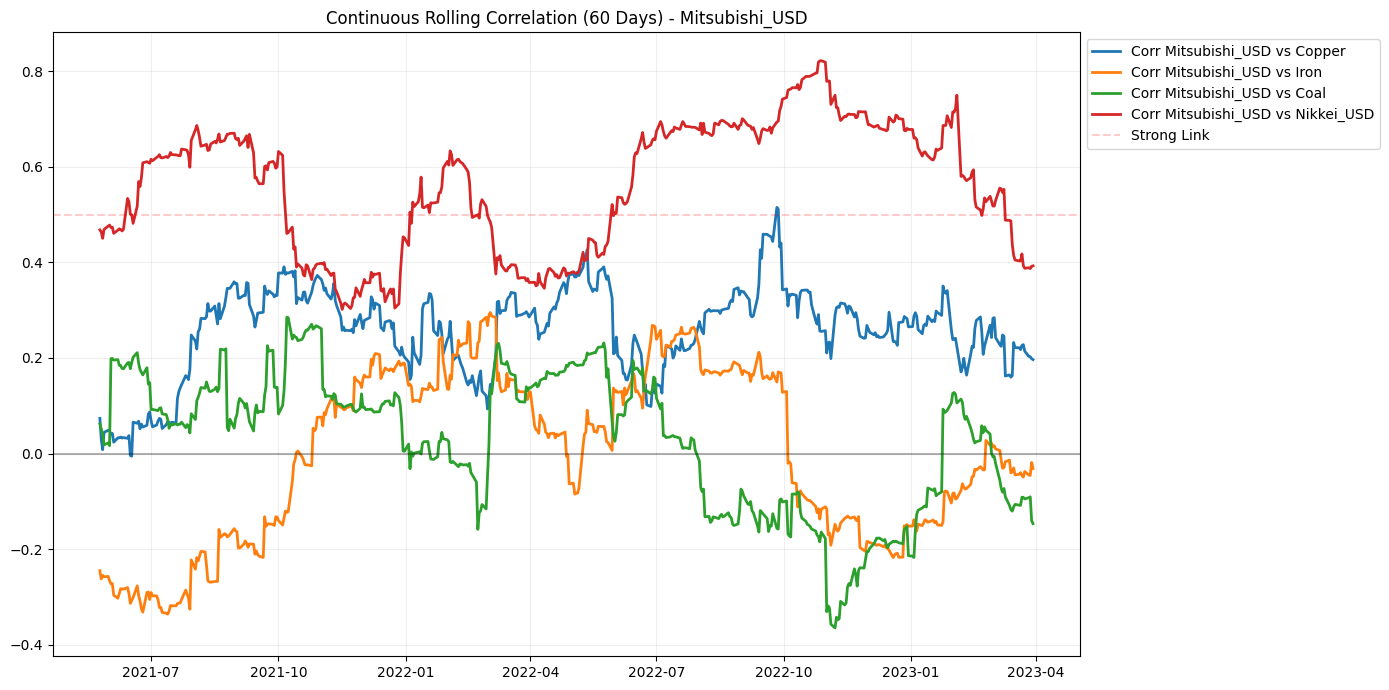

metal_rolling_60.csv generated at: processed_data/comm_analysis/metal/graph_data/
Graph generated at: plots/comm_analysis/metal/Rolling_Corr_60_metal.png
metal_vif_test.csv generated at: processed_data/comm_analysis/metal/validation/

--- Multicollinearity report (VIF) ---
  Variable       VIF
3     Iron  1.037101
1   Copper  1.029357
2     Coal  1.012001

--- Regression summary (R-squared: 0.07) ---
Copper: 81.90% contribution to variance
Coal: 7.74% contribution to variance
Iron: 10.36% contribution to variance


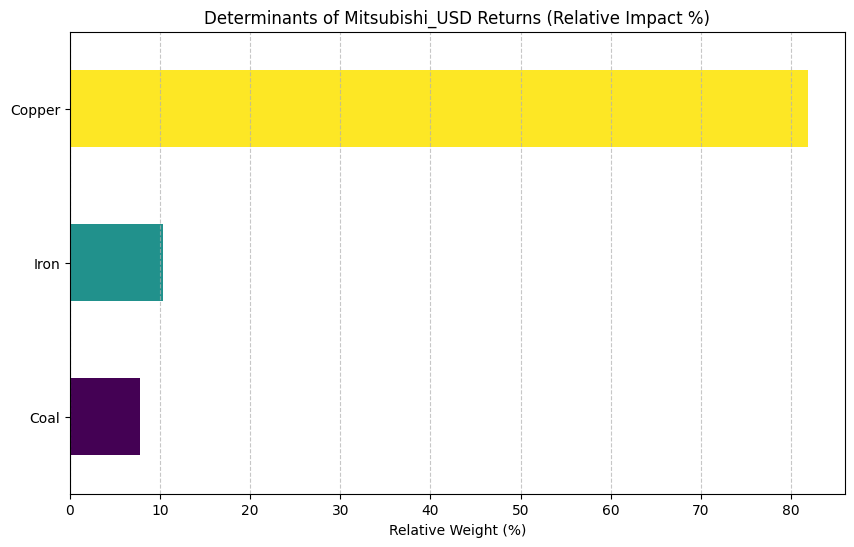

metal_ols_results.csv generated at: processed_data/comm_analysis/metal/model_results/
Graph generated at: plots/comm_analysis/metal
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     13.61
Date:                Wed, 25 Feb 2026   Prob (F-statistic):           1.47e-08
Time:                        20:45:17   Log-Likelihood:                 1444.2
No. Observations:                 524   AIC:                            -2880.
Df Residuals:                     520   BIC:                            -2863.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [6]:
import pandas as pd
import sys
import os
import importlib
import src.analytics_engine as ana
importlib.reload(ana)

tickers = {
    "8058.T": "Mitsubishi_JPY",
    "^N225": "Nikkei_JPY"
}

commodities_metal = {
    "HG=F": "Copper",
    "TIO=F": "Iron",
    "MTF=F": "Coal"
}
sector = "metal"
src_path = f"processed_data/comm_analysis/{sector}"

#JPY TO USD Mitsubishi conversion
data_fx = ana.download_and_convert_tickers(tickers, "2021-03-01", "2023-03-31", "JPY=X")

#Metallurgy sector data download and treatment
df_metal = ana.download_comm(commodities_metal, "2021-03-01", "2023-03-31", sector)
df_metal_sync = pd.read_csv(f"{src_path}/{sector}_shifted_prices.csv", index_col='Date', parse_dates=True)

#Base 100 Metallurgy commodities comparison 2021-2023
ana.plot_base(df_metal, "Metallurgy sector (Base 100 - 2021 & 2023)", 100, "2021-04-01", "", sector)

#ADF TEST
ana.check_adf(df_metal, sector)
ana.check_adf(data_fx, "tickers")

#Commodities correlation 
ana.comm_cor(df_metal, "Metallurgy sector 2021-2022", "2021-04-01", "2023-03-31", sector)

#Rolling correlation
df_combined = pd.concat([df_metal_sync, data_fx], axis=1).ffill().dropna()
assets_to_compare = df_combined[['Copper', 'Iron', 'Coal', 'Nikkei_USD']]
ana.plot_rolling_corr(data_fx, assets_to_compare,"Mitsubishi_USD", sector)

#Multicollinearity test
ana.check_vif(df_metal_sync, sector)

#OLS test
ana.check_ols(data_fx, df_metal_sync, "Mitsubishi_USD", sector)

ana.generate_sector_report(sector)

[*********************100%***********************]  3 of 3 completed

agro_prices.csv generated at: processed_data/comm_analysis/agro


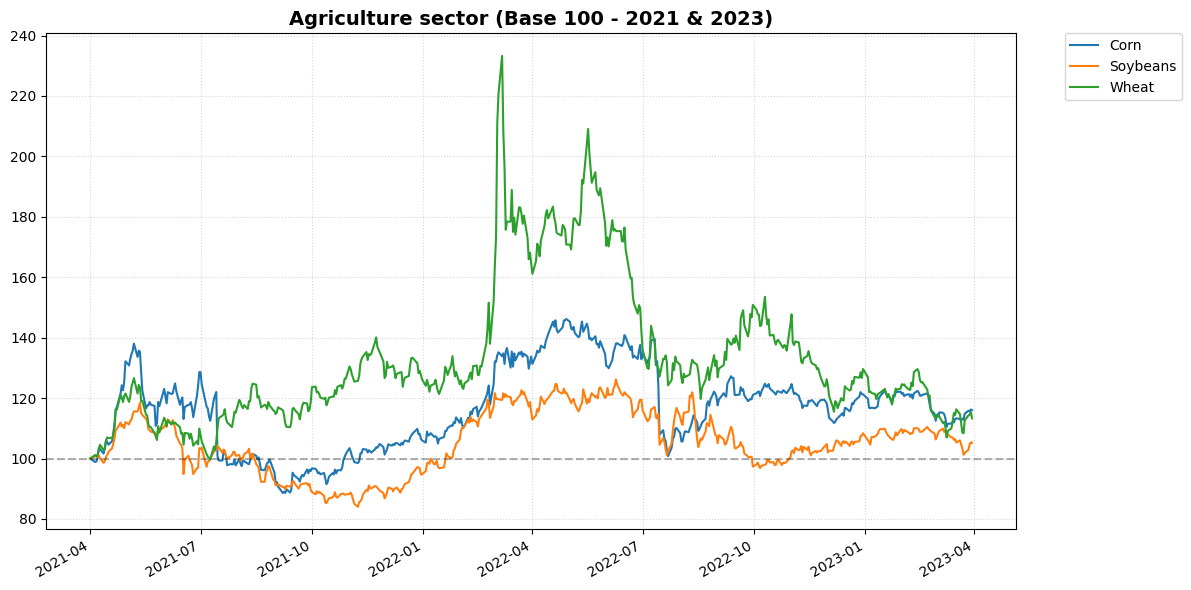

agro_base_100.csv generated at: processed_data/comm_analysis/agro/graph_data/
Graph generated at: plots/comm_analysis/agro/Base_100_agro.png
--- ADF Test Results for: Copper (LOG-RETURNS) ---
ADF Statistic: -10.7046
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Coal (LOG-RETURNS) ---
ADF Statistic: -21.5827
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Iron (LOG-RETURNS) ---
ADF Statistic: -9.4393
p-value: 0.0000
Result: STATIONARY
----------------------------------------
agro_adf_test.csv generated at: processed_data/comm_analysis/agro/validation/


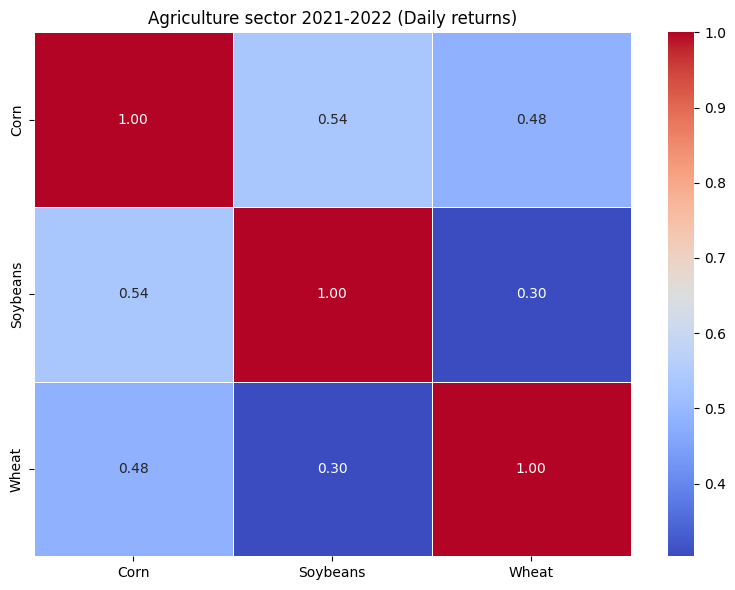

agro_corr_matrix.csv generated at: processed_data/comm_analysis/agro/graph_data/
Graph generated at: plots/comm_analysis/agro/Daily_Corr_agro.png


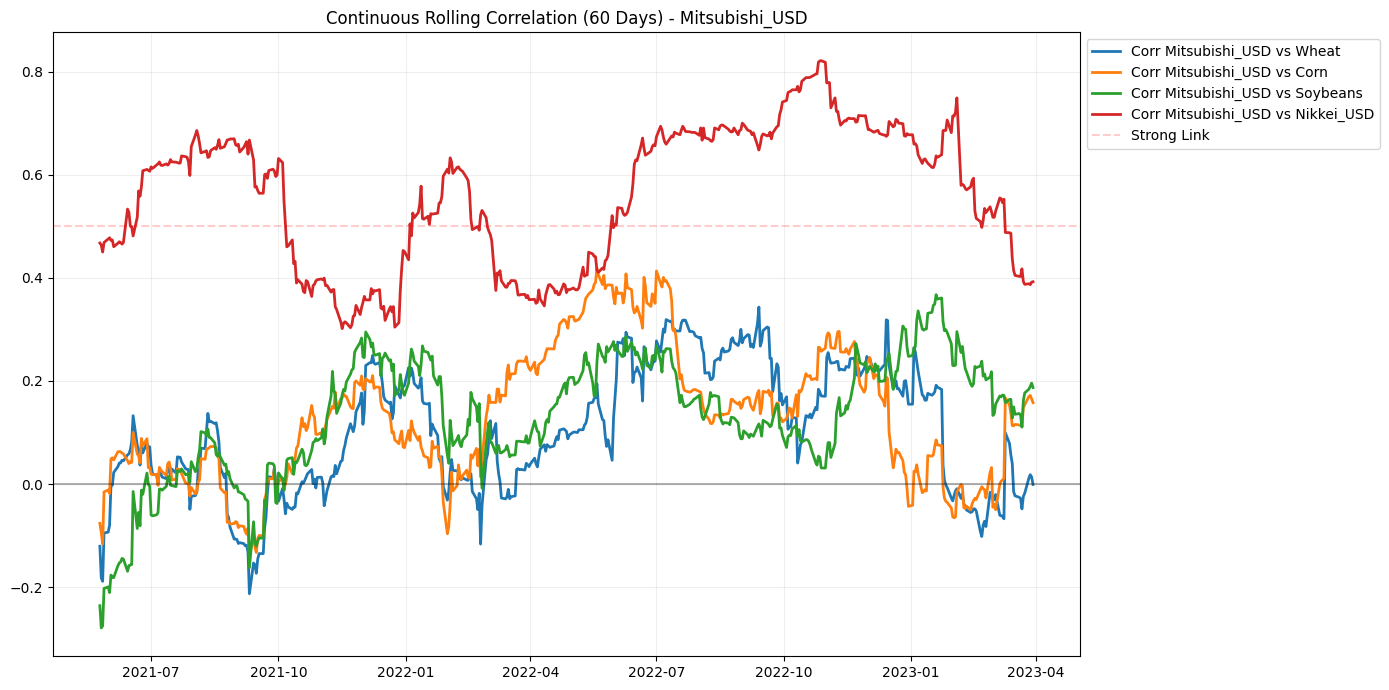

agro_rolling_60.csv generated at: processed_data/comm_analysis/agro/graph_data/
Graph generated at: plots/comm_analysis/agro/Rolling_Corr_60_agro.png
agro_vif_test.csv generated at: processed_data/comm_analysis/agro/validation/

--- Multicollinearity report (VIF) ---
   Variable       VIF
1      Corn  1.686366
2  Soybeans  1.430628
3     Wheat  1.308906

--- Regression summary (R-squared: 0.02) ---
Corn: 31.94% contribution to variance
Soybeans: 33.07% contribution to variance
Wheat: 34.98% contribution to variance


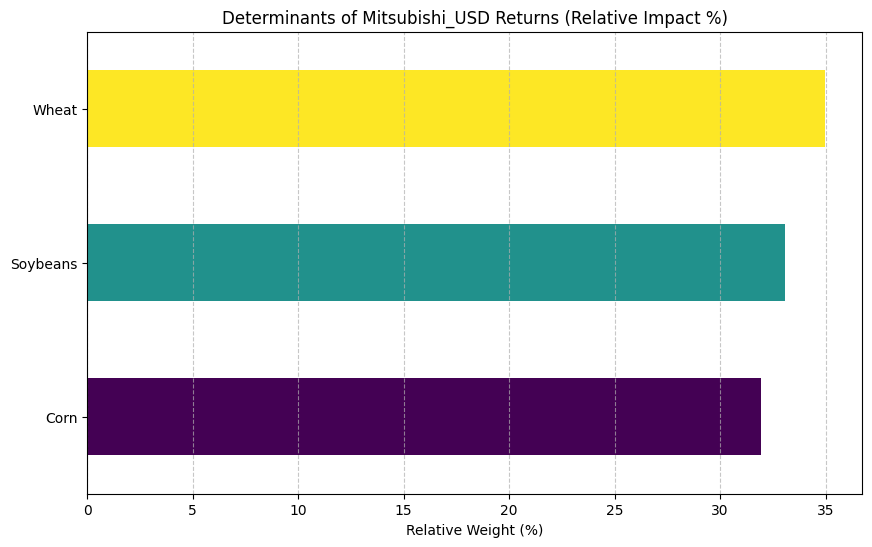

agro_ols_results.csv generated at: processed_data/comm_analysis/agro/model_results/
Graph generated at: plots/comm_analysis/agro
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.159
Date:                Wed, 25 Feb 2026   Prob (F-statistic):            0.00630
Time:                        20:45:18   Log-Likelihood:                 1430.6
No. Observations:                 524   AIC:                            -2853.
Df Residuals:                     520   BIC:                            -2836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [7]:
importlib.reload(ana)

commodities_agro = {
    "ZW=F": "Wheat",
    "ZC=F": "Corn",
    "ZS=F": "Soybeans"
}
sector = "agro"
src_path = f"processed_data/comm_analysis/{sector}"

#Download and agricultural data treatment
df_agro = ana.download_comm(commodities_agro, "2021-03-01", "2023-03-31", sector)
df_agro_sync = pd.read_csv(f"{src_path}/{sector}_shifted_prices.csv", index_col='Date', parse_dates=True)

# #Base 100 agricultural commodities comparison 2021-2023
ana.plot_base(df_agro, "Agriculture sector (Base 100 - 2021 & 2023)", 100, "2021-04-01", "2023-03-31", sector)

#ADF TEST
ana.check_adf(df_metal, sector)

#Commodities correlation 
ana.comm_cor(df_agro, "Agriculture sector 2021-2022", "2021-04-01", "2023-03-31", sector)

#Rolling correlation
df_combined = pd.concat([df_agro_sync, data_fx], axis=1).ffill().dropna()
assets_to_compare = df_combined[['Wheat', 'Corn', 'Soybeans', 'Nikkei_USD']]
ana.plot_rolling_corr(data_fx, assets_to_compare,"Mitsubishi_USD", sector)

#Multicollinearity test
ana.check_vif(df_agro_sync, sector)

#OLS test
ana.check_ols(data_fx, df_agro_sync, "Mitsubishi_USD", sector)

ana.generate_sector_report(sector)

[*********************100%***********************]  3 of 3 completed

energy_prices.csv generated at: processed_data/comm_analysis/energy


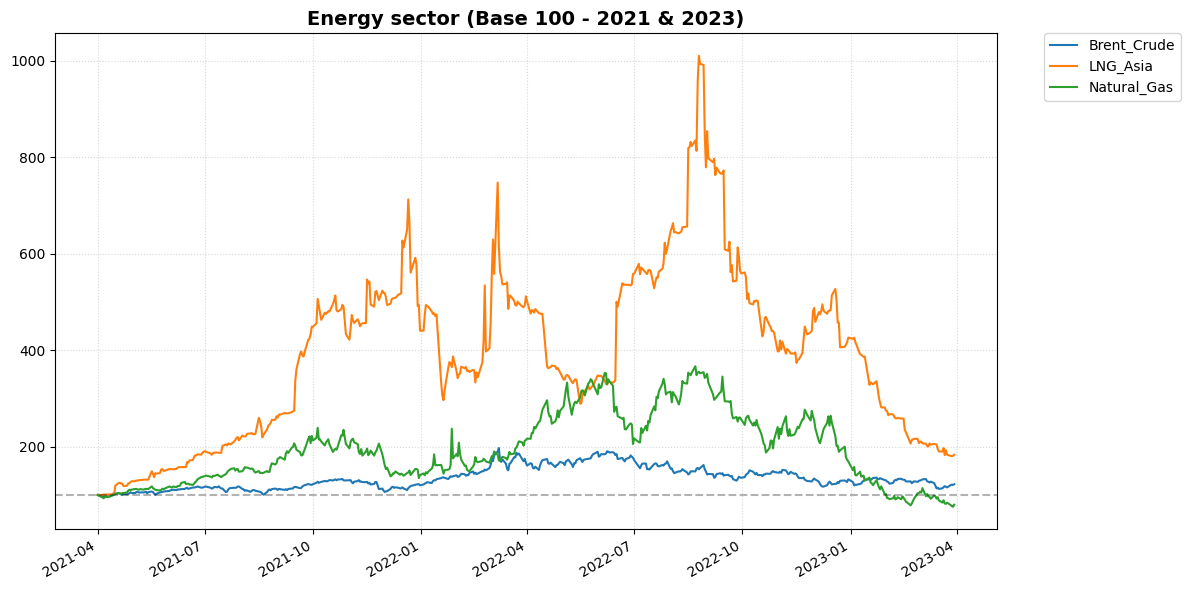

energy_base_100.csv generated at: processed_data/comm_analysis/energy/graph_data/
Graph generated at: plots/comm_analysis/energy/Base_100_energy.png
--- ADF Test Results for: Brent_Crude (LOG-RETURNS) ---
ADF Statistic: -9.4451
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: LNG_Asia (LOG-RETURNS) ---
ADF Statistic: -23.3750
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Natural_Gas (LOG-RETURNS) ---
ADF Statistic: -26.8471
p-value: 0.0000
Result: STATIONARY
----------------------------------------
energy_adf_test.csv generated at: processed_data/comm_analysis/energy/validation/


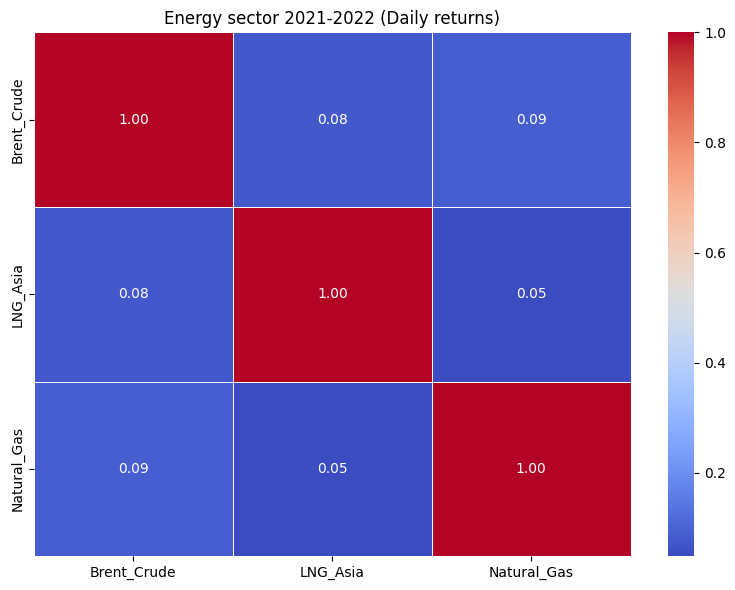

energy_corr_matrix.csv generated at: processed_data/comm_analysis/energy/graph_data/
Graph generated at: plots/comm_analysis/energy/Daily_Corr_energy.png


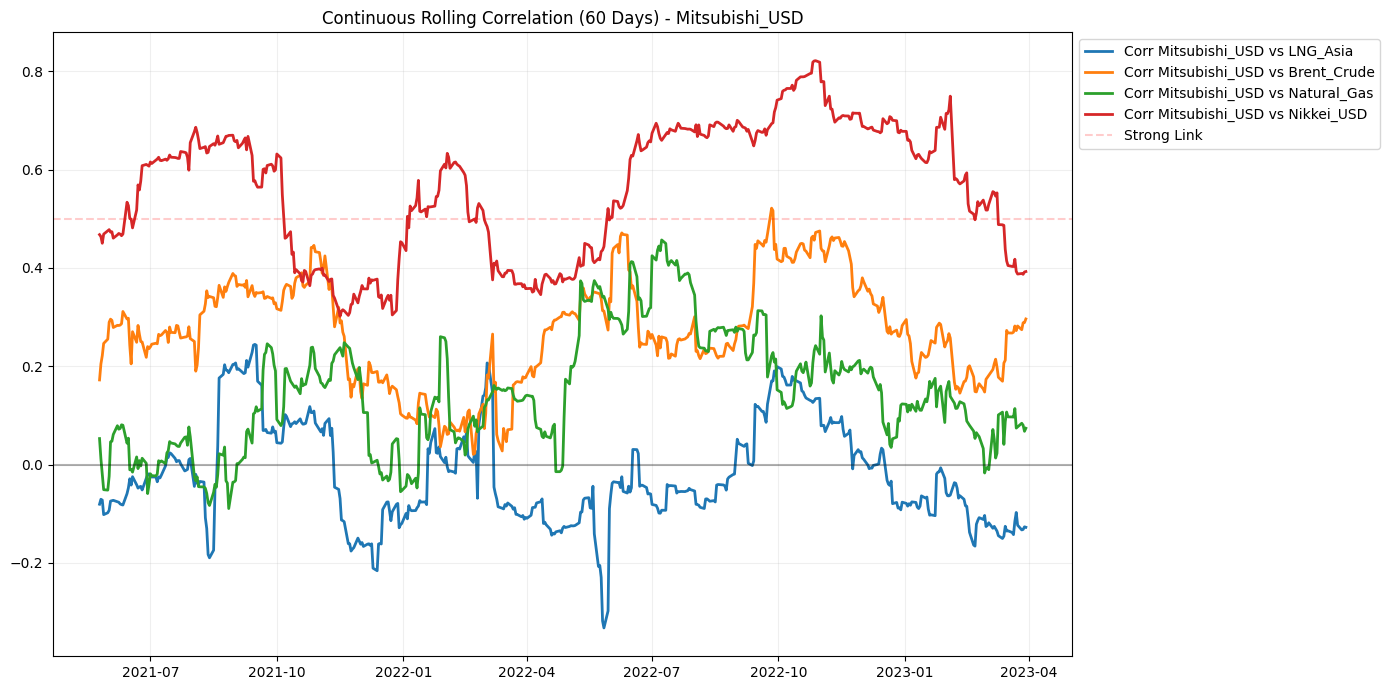

energy_rolling_60.csv generated at: processed_data/comm_analysis/energy/graph_data/
Graph generated at: plots/comm_analysis/energy/Rolling_Corr_60_energy.png
energy_vif_test.csv generated at: processed_data/comm_analysis/energy/validation/

--- Multicollinearity report (VIF) ---
      Variable       VIF
1  Brent_Crude  1.012141
3  Natural_Gas  1.009192
2     LNG_Asia  1.007026

--- Regression summary (R-squared: 0.10) ---
Brent_Crude: 58.24% contribution to variance
LNG_Asia: 13.83% contribution to variance
Natural_Gas: 27.93% contribution to variance


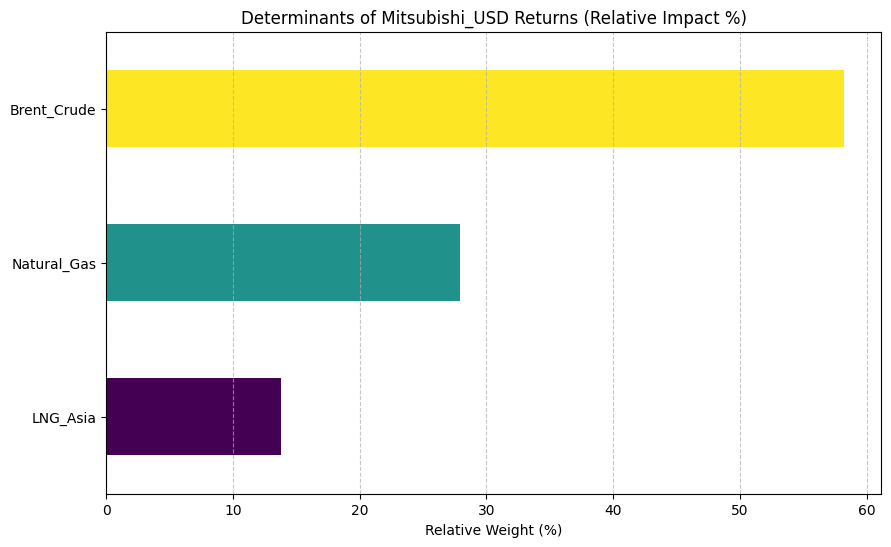

energy_ols_results.csv generated at: processed_data/comm_analysis/energy/model_results/
Graph generated at: plots/comm_analysis/energy
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     18.98
Date:                Wed, 25 Feb 2026   Prob (F-statistic):           1.08e-11
Time:                        20:45:19   Log-Likelihood:                 1451.6
No. Observations:                 524   AIC:                            -2895.
Df Residuals:                     520   BIC:                            -2878.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.

In [8]:
commodities_ener = {
    "JKM=F": "LNG_Asia",
    "BZ=F": "Brent_Crude",
    "NG=F": "Natural_Gas"
}
sector = "energy"
src_path = f"processed_data/comm_analysis/{sector}"

#Download and energy data treatment
df_ener = ana.download_comm(commodities_ener, "2021-03-01", "2023-03-31", sector)
df_ener_sync = pd.read_csv(f"{src_path}/{sector}_shifted_prices.csv", index_col='Date', parse_dates=True)

#Base 100 energy commodities comparison 2021-2023
ana.plot_base(df_ener, "Energy sector (Base 100 - 2021 & 2023)", 100, "2021-04-01", "2023-03-31", sector)

#ADF TEST
ana.check_adf(df_ener, sector)

#Commodities correlation 
ana.comm_cor(df_ener, "Energy sector 2021-2022", "2021-04-01", "2023-03-31", sector)

#Rolling correlation
df_combined = pd.concat([df_ener_sync, data_fx], axis=1).ffill().dropna()
assets_to_compare = df_combined[['LNG_Asia', 'Brent_Crude', 'Natural_Gas', 'Nikkei_USD']]
ana.plot_rolling_corr(data_fx, assets_to_compare,"Mitsubishi_USD", sector)

#Multicollinearity test
ana.check_vif(df_ener_sync, sector)

#OLS test
ana.check_ols(data_fx, df_ener_sync, "Mitsubishi_USD", sector)

ana.generate_sector_report(sector)

OLS dataset ready: 538 rows | columns: ['Nikkei_USD', 'Corn', 'Brent_Crude', 'Natural_Gas', 'LNG_Asia', 'Copper']
--- ADF Test Results for: Nikkei_USD (LOG-RETURNS) ---
ADF Statistic: -24.6231
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Corn (LOG-RETURNS) ---
ADF Statistic: -6.5665
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Brent_Crude (LOG-RETURNS) ---
ADF Statistic: -11.3573
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Natural_Gas (LOG-RETURNS) ---
ADF Statistic: -27.0129
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: LNG_Asia (LOG-RETURNS) ---
ADF Statistic: -23.9738
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Copper (LOG-RETURNS) ---
ADF Statistic: -10.8610
p-value: 0.0000
Result: STATIONARY
--------

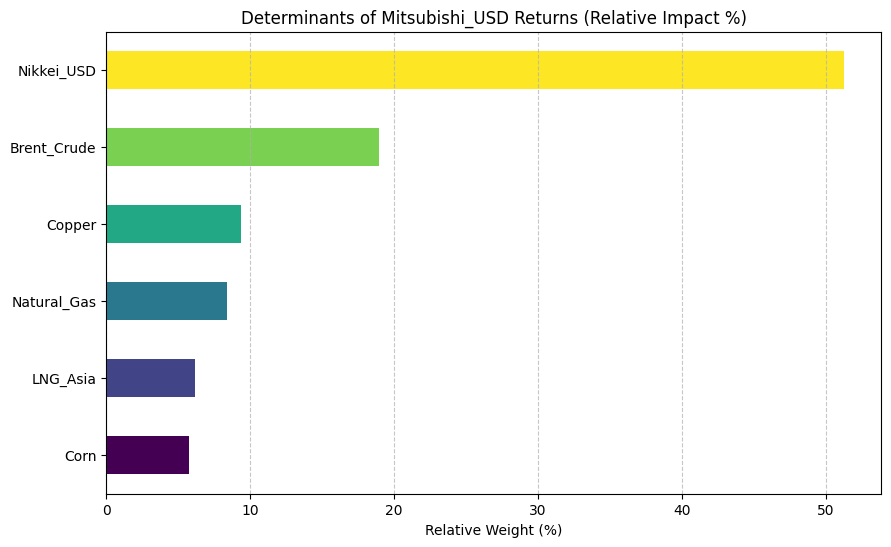

all_commodities_ols_results.csv generated at: processed_data/comm_analysis/all_commodities/model_results/
Graph generated at: plots/comm_analysis/all_commodities
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     56.32
Date:                Wed, 25 Feb 2026   Prob (F-statistic):           9.42e-54
Time:                        20:45:19   Log-Likelihood:                 1582.7
No. Observations:                 537   AIC:                            -3151.
Df Residuals:                     530   BIC:                            -3121.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t    

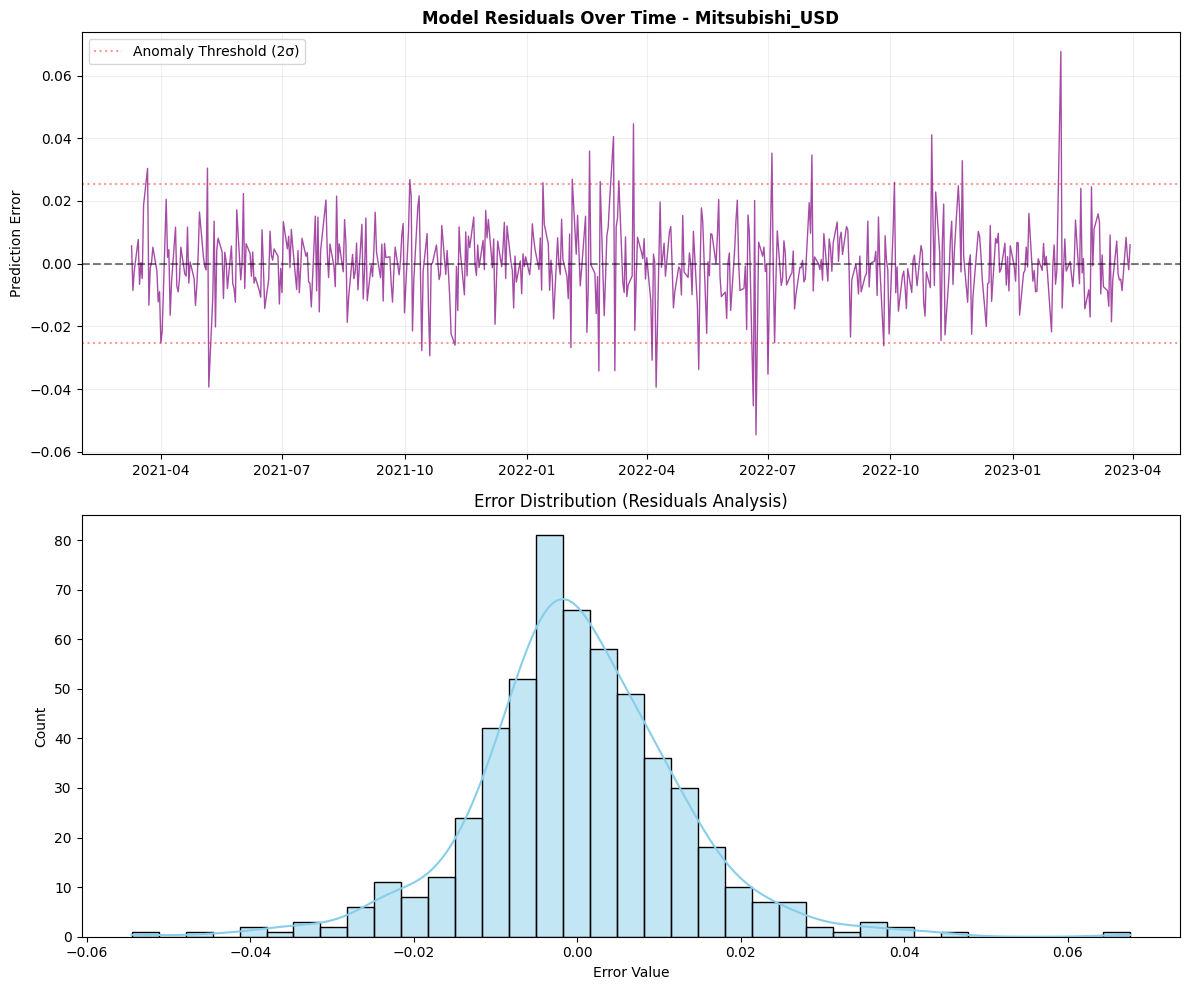


--- Outlier Detection: Largest Residuals for Mitsubishi_USD ---
Date
2023-02-06    0.067657
2022-06-22    0.054552
2022-06-20    0.045298
2022-03-22    0.044602
2022-11-01    0.041086
2022-03-07    0.040555
2022-04-08    0.039374
dtype: float64

--- Checking Granger Causality: Does             Nikkei_USD    Corn  Brent_Crude  Natural_Gas  LNG_Asia  Copper
Date                                                                      
2021-03-09  266.460484  547.50    68.239998        2.664     6.000  4.1035
2021-03-10  267.428273  560.75    67.519997        2.662     6.000  4.0195
2021-03-11  269.400554  550.25    67.900002        2.692     6.000  4.0420
2021-03-12  273.758279  546.25    69.629997        2.668     6.010  4.1430
2021-03-15  272.798662  562.00    69.220001        2.600     6.000  4.1455
...                ...     ...          ...          ...       ...     ...
2023-03-24  209.263354  632.75    75.910004        2.154    13.645  4.1460
2023-03-27  209.993967  634.25    74.9899

In [9]:
import importlib
import src.final_report as fin
import src.analytics_engine as ana
import src.ols_pipeline as pipe
importlib.reload(fin)
importlib.reload(ana)
importlib.reload(pipe)

ols_path = "processed_data/comm_analysis"
trends_ols_path = "processed_data/sentiment/final_ols"

data_fx_ready = ana.prepare_market_data(f"{ols_path}/tickers/dataset_tickers.csv")
df_agro_ready = ana.prepare_market_data(f"{ols_path}/agro/agro_shifted_prices.csv")
df_ener_ready = ana.prepare_market_data(f"{ols_path}/energy/energy_shifted_prices.csv")
df_metal_ready = ana.prepare_market_data(f"{ols_path}/metal/metal_shifted_prices.csv")

pipe.run_ols_pipeline(
    sector_name    = "all_commodities",
    data_fx_ready  = data_fx_ready,
    df_agro_ready  = df_agro_ready,
    df_ener_ready  = df_ener_ready,
    df_metal_ready = df_metal_ready,
);